Trying out the `sklearn.model_selection.GridSearchCV` functionality
---


In [8]:
# import packages
import numpy as np # numerical computation
import pandas as pd # data wrangling
from sklearn.model_selection import train_test_split # split data into training and test set
from sklearn.datasets import make_classification # generate synthetic classification datasets
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score # ROC AUC metric
from sklearn.metrics import roc_curve # ROC curve
import matplotlib as mpl # plotting functionality
import matplotlib.pyplot as plt # plotting package
import seaborn as sns # fancy plotting package

from sklearn.model_selection import GridSearchCV

# helps with rendering plots in notebook
%matplotlib inline 

mpl.rcParams["figure.dpi"] = 200 # high res images


In [2]:

# use make_classification to generate synthetic data
# This is the same data as in the original chapter 4
X_synthetic, y_synthetic = make_classification(n_samples=1000, n_features=200, n_informative=3, n_redundant=10,
                                                n_repeated=0, n_classes=2,
                                                n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=0.8,
                                                hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=24)

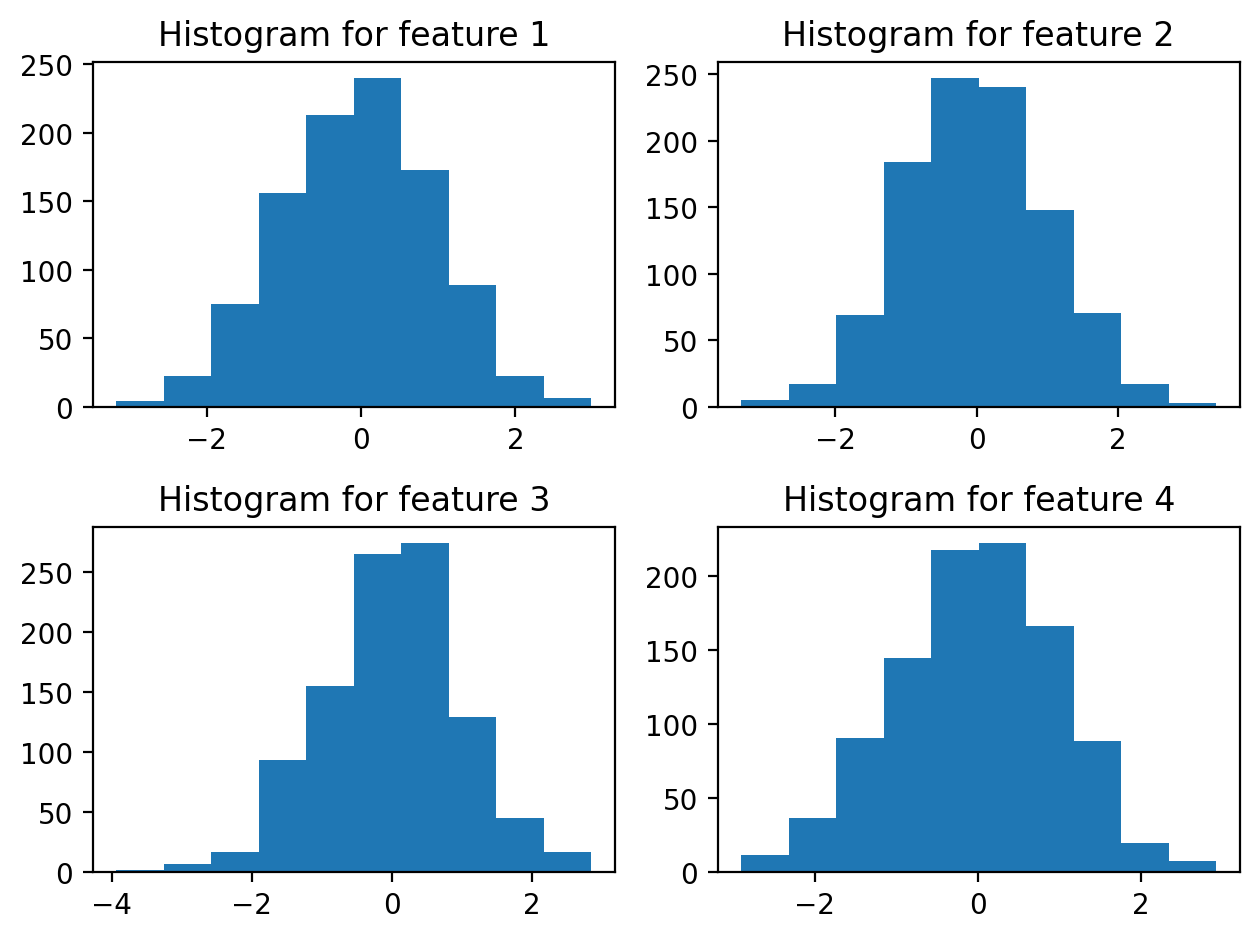

In [3]:

# same as in chapter 4, show histograms of some of the features
for plot_index in range(4):
    plt.subplot(2,2,plot_index+1)
    plt.hist(X_synthetic[:,plot_index])
    plt.title('Histogram for feature {}'.format(plot_index+1))
plt.tight_layout()

In [30]:
# This step is not strictly necessary. But it does provide a completely unseen test set. I only realized this later
# split the data into train and test sets 

# I'm not sure if this split is the same as in orginal chapter 4
X_train, X_test,y_train, y_test = train_test_split(X_synthetic, y_synthetic, test_size=0.3)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 200), (700,), (300, 200), (300,))

In [7]:
# define the logistic regression function
lr = LogisticRegression(solver="liblinear", penalty="l1", C = 1)

I can do a search over all of the model parameters by using `GridSearchCV()`and its `param_grid` argument

`param_grid` takes as input a dictionary with parameter names as keys and Lists of parameter settings as values.

`GridSearchCV` will search over all possible combinations of these parameter settings

Also see [scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [26]:
# define C-values
C_val_exponents = np.linspace(3,-3,31)
print("C_val_exponents:")
print(C_val_exponents[:5], C_val_exponents[-5:])
C_vals = float(10)**C_val_exponents
print()
print("C_vals:")
print(C_vals[:5], C_vals[-5:])

# Set the param_grid dictionary
parameter_grid = {
    "C": C_vals
    
}

C_val_exponents:
[3.  2.8 2.6 2.4 2.2] [-2.2 -2.4 -2.6 -2.8 -3. ]

C_vals:
[1000.          630.95734448  398.10717055  251.18864315  158.48931925] [0.00630957 0.00398107 0.00251189 0.00158489 0.001     ]


In [28]:
my_grid_search = GridSearchCV(estimator=lr, param_grid=parameter_grid, scoring="roc_auc", n_jobs=-1, verbose=True)

In [31]:
my_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 31 candidates, totalling 155 fits


GridSearchCV(estimator=LogisticRegression(C=1, penalty='l1',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e+03, 6.30957344e+02, 3.98107171e+02, 2.51188643e+02,
       1.58489319e+02, 1.00000000e+02, 6.30957344e+01, 3.98107171e+01,
       2.51188643e+01, 1.58489319e+01, 1.00000000e+01, 6.30957344e+00,
       3.98107171e+00, 2.51188643e+00, 1.58489319e+00, 1.00000000e+00,
       6.30957344e-01, 3.98107171e-01, 2.51188643e-01, 1.58489319e-01,
       1.00000000e-01, 6.30957344e-02, 3.98107171e-02, 2.51188643e-02,
       1.58489319e-02, 1.00000000e-02, 6.30957344e-03, 3.98107171e-03,
       2.51188643e-03, 1.58489319e-03, 1.00000000e-03])},
             scoring='roc_auc', verbose=True)

In [35]:
# save the results of the cross-validation search
crossvalidation_score = pd.DataFrame(my_grid_search.cv_results_)
pd.DataFrame(my_grid_search.cv_results_)[:][:5]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.587364,2.414904,0.014128,0.004530,1000.0,{'C': 1000.0},0.740968,0.706062,0.670408,0.731224,0.752857,0.720304,0.029320,27
1,3.593905,2.480462,0.011426,0.006169,630.957344,{'C': 630.957344480193},0.741172,0.706062,0.670816,0.731020,0.753061,0.720426,0.029241,26
2,4.094567,2.827621,0.016412,0.011058,398.107171,{'C': 398.1071705534973},0.740968,0.706267,0.671020,0.730816,0.753878,0.720590,0.029292,25
3,3.492038,2.441150,0.011208,0.006819,251.188643,{'C': 251.18864315095797},0.740151,0.706062,0.672449,0.730816,0.753878,0.720671,0.028719,24
4,4.083735,2.700797,0.008304,0.003798,158.489319,{'C': 158.48931924611142},0.739947,0.706267,0.672653,0.731633,0.754286,0.720957,0.028756,23


<AxesSubplot: >

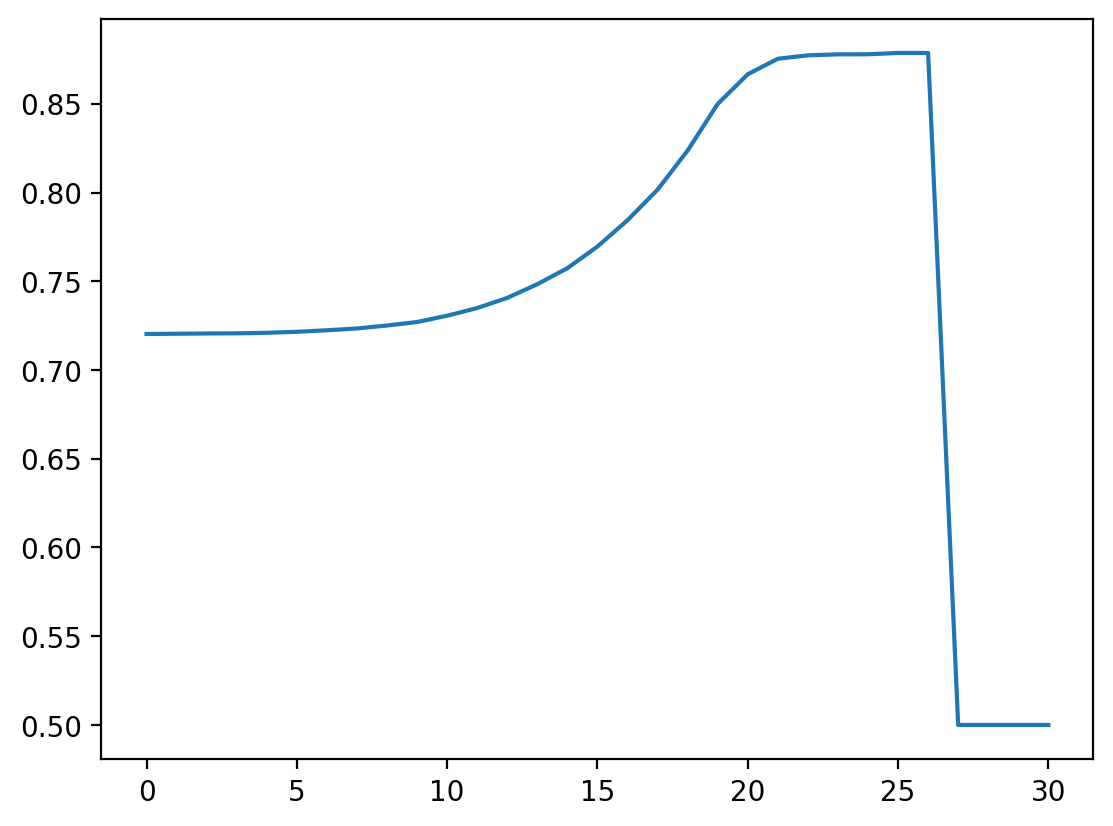

In [38]:
# plot the mean test score
crossvalidation_score["mean_test_score"].plot()
# Awesome!


In [47]:
print("index of best performing parameter:", np.argmin(crossvalidation_score["rank_test_score"])) 
# the above gets me the index position of the best ranked test score (rank 1) at 25, seems reasonable

# now let's get the best C-parameter
print("C-parameter with best performance:", crossvalidation_score["param_C"][np.argmin(crossvalidation_score["rank_test_score"])])
print("Best performance:", crossvalidation_score["mean_test_score"][np.argmin(crossvalidation_score["rank_test_score"])])

index of best performing parameter: 25
C-parameter with best performance: 0.01
Best performance: 0.8786412970577085


In [44]:
# now let's see performance on test set
my_grid_search.score(X_test, y_test)

0.8810190742963852

Okay so the splitting into train and test set was not entirely necessary, because `GridSearchCV` does that automatically. However, this way we have both a validation *and* a test set.

And the model seems to generalize well, judging from the scores for train and validation sets being similar.

The sklearn inbuilt function seems to lack some of the features implemented in Chapter 4, like being able to plot the different ROC curves for each parameter(?) or plotting training vs test-set performance depending on the C parameter values.